In [276]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import os


from torch.utils.data import Dataset

import pandas, random, numpy
import matplotlib.pyplot as plt

from PIL import Image, ImageOps


In [277]:
import glob
import PIL

from sklearn.model_selection import train_test_split

In [278]:
civs_path = '/Users/Eric/Desktop/Purdue/Junior Year/Spring Semester/ITS365/PokemonImages/images/images'

In [279]:
path  = civs_path

paths = glob.glob(path + "/*.png") # Grabbing all the image file names

n_images = len(paths)

rand_idxs = np.random.permutation(n_images)

paths_subset = np.random.choice(paths, n_images , replace=False) 
all_paths    = paths_subset[rand_idxs]

print(n_images)

100


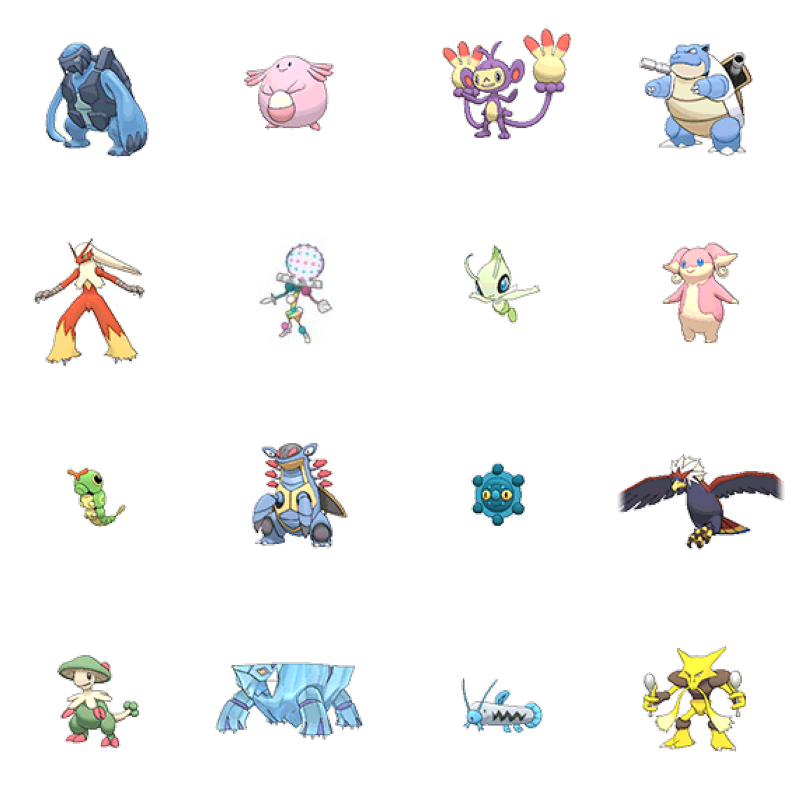

In [280]:
_, axes = plt.subplots(4, 4, figsize=(10, 10))

for ax, img_path in zip(axes.flatten(), all_paths):
    ax.imshow(Image.open(img_path))
    ax.axis("off")

In [281]:

# Directory containing the renamed Pokemon images
directory = '/Users/Eric/Desktop/Purdue/Junior Year/Spring Semester/ITS365/PokemonImages/images/images/'

# Function to extract features from filename and convert non-numeric features to numeric values
def extract_features(filename):
    # Split the filename into parts based on underscores
    parts = filename[:-4].split('_')  # Exclude the '.png' extension
    
    # Extract features
    pokemon_name = parts[0]
    type1 = parts[1]
    type2 = parts[2]
    shape = parts[3]
    stage = parts[4]
    generation = parts[5]

    # Convert non-numeric features to numeric values
    type_mapping = {'Normal': 1, 'Fire': 2, 'Water': 3, 'Electric': 4, 'Grass': 5, 'Ice': 6, 'Fighting': 7, 'Poison': 8, 'Ground': 9, 'Flying': 10, 'Psychic': 11, 'Bug': 12, 'Rock': 13, 'Ghost': 14, 'Dragon': 15, 'Dark': 16, 'Steel': 17, 'Fairy': 18}  # Example type mapping
    shape_mapping = {'Head': 1, 'HeadAndLegs': 2, 'Fins': 3, 'Insectoid': 4, 'QuadrupedBody': 5, 'TwoPlusWings': 6, 'MultipleBodies': 7, 'Tentacles': 8, 'HeadAndBase': 9, 'BipedalTailed': 10, 'BipedalTailless': 11, 'SingleWings': 12, 'Serpentine': 13, 'HeadAndArms': 14 }  # Example shape mapping
    stage_mapping = {'Child': 1, 'Teen': 2, 'Adult': 3}  # Example stage mapping
    generation_mapping = {'1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8}  # Example generation mapping
    
    type1_numeric = type_mapping.get(type1, 0)  # Default to 0 if type1 not found in mapping
    type2_numeric = type_mapping.get(type2, 0)  # Default to 0 if type2 not found in mapping
    shape_numeric = shape_mapping.get(shape, 0)  # Default to 0 if shape not found in mapping
    stage_numeric = stage_mapping.get(stage, 0)  # Default to 0 if stage not found in mapping
    generation_numeric = generation_mapping.get(generation, 0)  # Default to 0 if generation not found in mapping
    
    return type1_numeric, type2_numeric, shape_numeric, stage_numeric, generation_numeric

# Loop through each file in the directory
for filename in os.listdir(directory):       
    if filename.endswith('.png'):
        # Open the image
        image_path = os.path.join(directory, filename)
        img = Image.open(image_path)

        # Convert to RGBA format if the image mode is not already RGBA
        if img.mode != 'RGBA':
            img = img.convert('RGBA')
            img.save(image_path)  # Overwrite the original image with the converted one

        img.close()  # Close the image to release resources
        features = extract_features(filename)
        print(features)


(12, 0, 4, 1, 1)
(1, 18, 2, 1, 3)
(1, 0, 1, 3, 3)
(5, 8, 11, 1, 1)
(13, 10, 12, 3, 5)
(17, 11, 1, 1, 4)
(6, 10, 12, 3, 1)
(15, 0, 11, 1, 3)
(13, 10, 12, 1, 5)
(3, 18, 10, 3, 2)
(2, 0, 10, 1, 1)
(12, 0, 14, 3, 5)
(13, 18, 1, 3, 6)
(12, 0, 1, 2, 3)
(13, 12, 10, 3, 3)
(2, 7, 10, 3, 3)
(1, 0, 10, 1, 4)
(16, 0, 5, 3, 3)
(5, 8, 14, 3, 5)
(5, 0, 2, 1, 7)
(3, 12, 4, 3, 7)
(17, 13, 10, 3, 3)
(17, 14, 9, 3, 6)
(5, 0, 2, 3, 4)
(6, 0, 5, 3, 5)
(13, 6, 5, 1, 6)
(12, 10, 6, 3, 3)
(5, 8, 11, 1, 4)
(1, 10, 12, 3, 5)
(3, 0, 3, 2, 7)
(17, 11, 14, 3, 4)
(5, 7, 10, 3, 3)
(1, 0, 10, 2, 1)
(2, 10, 10, 3, 1)
(2, 14, 11, 3, 7)
(1, 0, 10, 1, 6)
(18, 0, 11, 3, 6)
(4, 0, 5, 1, 5)
(6, 0, 5, 3, 6)
(17, 13, 5, 1, 3)
(2, 0, 10, 2, 6)
(12, 8, 6, 3, 1)
(3, 0, 3, 3, 5)
(5, 0, 7, 1, 4)
(1, 3, 10, 3, 4)
(3, 11, 3, 3, 7)
(11, 0, 11, 3, 1)
(11, 0, 10, 3, 4)
(1, 0, 10, 3, 4)
(1, 0, 10, 3, 5)
(13, 3, 7, 1, 6)
(14, 2, 14, 3, 5)
(16, 17, 11, 2, 5)
(12, 4, 13, 2, 7)
(1, 0, 5, 1, 4)
(3, 0, 10, 3, 1)
(6, 0, 5, 1, 6)
(1, 7, 10, 3,

In [282]:
list_imgs = []
list_label_vectors = []

for img_name in all_paths:
    print(img_name)
    
    my_img = Image.open(img_name)
    
    my_img = my_img.resize((120, 120))

    img_np = np.array(my_img)
    
    data = np.array(my_img, dtype='uint8')
    print(data)
    ##input()

    
    temp_label_vector_rc = extract_features(img_name)
    print(img_np.shape)
    list_imgs.append(img_np)

    list_label_vectors.append( temp_label_vector_rc )

/Users/Eric/Desktop/Purdue/Junior Year/Spring Semester/ITS365/PokemonImages/images/images/carracosta_Water_Rock_BipedalTailed_Adult_5.png
[[[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  ...
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 [[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  ...
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 [[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  ...
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 ...

 [[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  ...
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 [[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  ...
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 [[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  ...
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]]
(120, 120, 4)
/Users/Eric/Desktop/Purdue/Junior Year/Spring Semester/ITS365/PokemonImages/images/images/chansey_Normal_None_BipedalTailed_Teen_1.png
[[[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  ...
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 [[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  ...
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 [[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  ...
  [0 0 0 0]
  [0 0 0 0]
 

[255 136  51 255]


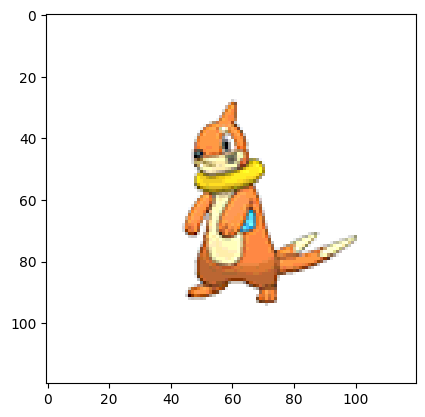

In [283]:
plt.imshow(img_np)
print(img_np[60, 60])

In [284]:
X =  list_imgs
y =  list_label_vectors 

In [285]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#######################################################

print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

80
20
80
20


In [286]:
X_train[2]

array([[[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       ...,

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]]], dtype=uint8)

In [287]:
list_ids_train      = []
list_features_train = []
list_imgs_train     = []


for index in range(len(X_train)):
    
    # image target (label)
    reg_vals = y_train[index]
    target = np.zeros( (3) )
    
    target[ 0 ] = reg_vals[2]
    target[ 1 ] = reg_vals[3]
    target[ 2 ] = reg_vals[4]


    # image data, normalised from 0-255 to 0-1
    single_np_img = X_train[index]
    image_values = torch.FloatTensor(  single_np_img.astype(float)  ) / 255.0
    image_values = torch.FloatTensor(  single_np_img.astype(float)  ).permute(2,0,1).reshape(1,3,240,80) / 255.0
    

        
    list_ids_train.append(          reg_vals[0]                )
    list_imgs_train.append(        single_np_img               )
    list_features_train.append(    target      )

[0 0 0 0]


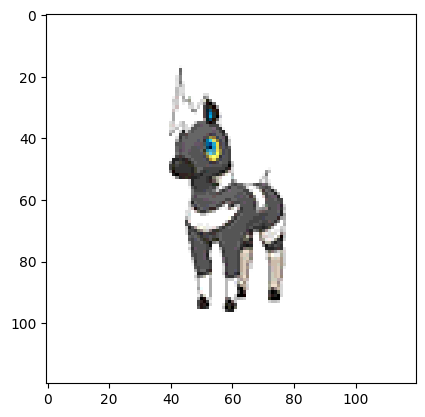

In [288]:

list_imgs_train[1]
plt.imshow(list_imgs_train[1])
print(list_imgs_train[1][40,60])

In [289]:
list_ids_test      = []
list_features_test = []
list_imgs_test     = []


for index in range(len(X_test)):
    
    # image target (label)
    reg_vals = y_test[index]
    target = np.zeros( (3) )
    
    target[ 0 ] = reg_vals[2]
    target[ 1 ] = reg_vals[3]
    target[ 2 ] = reg_vals[4]


    # image data, normalised from 0-255 to 0-1
    single_np_img = X_test[index]
    image_values = torch.FloatTensor(  single_np_img.astype(float)  ) / 255.0
    image_values = torch.FloatTensor(  single_np_img.astype(float)  ).permute(2,0,1).reshape(1,3,240,80) / 255.0
    

        
    list_ids_test.append(          reg_vals[0]                )
    list_imgs_test.append(        single_np_img               )
    list_features_test.append(    target      )

[0 0 0 0]


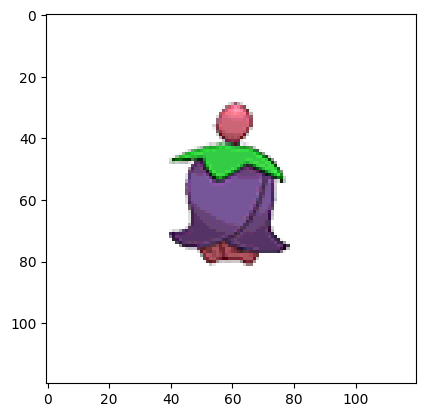

In [290]:
list_imgs_test[1]
plt.imshow(list_imgs_test[1])
print(list_imgs_test[1][90,60])

In [291]:
conditions_matrix_train = np.array( list_features_train )
conditions_matrix_test  = np.array( list_features_test )

In [292]:
print( conditions_matrix_train.shape )
print( conditions_matrix_test.shape  )

(80, 3)
(20, 3)


In [293]:
DF_conditions_train = pd.DataFrame(conditions_matrix_train)
DF_conditions_train.to_csv("/Users/Eric/Desktop/Purdue/Junior Year/Spring Semester/ITS365/untitled folder/PD_conditions_train.csv")

In [294]:
DF_ids_train = pd.DataFrame(list_ids_train)
DF_ids_train.to_csv("/Users/Eric/Desktop/Purdue/Junior Year/Spring Semester/ITS365/untitled folder/PD_ids_train.csv")

In [295]:
list_imgs_train[17]

array([[[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       ...,

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]]], dtype=uint8)

In [296]:
list_imgs_train[20].shape

(120, 120, 4)

In [297]:
list_imgs_train_stretched = []
for i in list_imgs_train:
    stretched = i.reshape(-1)
    list_imgs_train_stretched.append(stretched)
len(list_imgs_train_stretched)

80

In [298]:
list_imgs_train_stretched[79]

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [299]:
list_imgs_train_stretched[7].shape

(57600,)

In [300]:
list_imgs_train_stretched[56][:1000]


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [301]:
np_list_imgs_train_stretched = np.array( list_imgs_train_stretched ) 

In [302]:
np_list_imgs_train_stretched.shape

(80, 57600)

In [303]:
np_list_imgs_train_stretched[3]

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [304]:
DF_imgs_np_train = pd.DataFrame(np_list_imgs_train_stretched)

In [305]:
DF_imgs_np_train

,0,1,2,3,4,5,6,7,8,9,...,57590,57591,57592,57593,57594,57595,57596,57597,57598,57599
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
76,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
77,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
78,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [308]:
DF_imgs_np_train.to_csv("/Users/Eric/Desktop/Purdue/Junior Year/Spring Semester/ITS365/untitled folder/PD_imgs_np_train.csv")